# Assignment 6: Weather
***

Author: Filipe Carvalho

Task: Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

In [16]:
# Import modules

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

## Getting Data

Read in the data from link: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [4]:
# Read in dataframe and skip 

url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url, skiprows=22)

df.head(3)

/var/folders/rk/fh00kl713wq4442gfb60yzk40000gn/T/ipykernel_26882/1136611274.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [5]:
# Confirming data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

In [6]:
# Getting some insight of the statistics of the variable data

df.describe()

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
count,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000,248394.000000
mean,0.469512,0.021067,8.762963,0.033491,7.811541,6.712935,10.207989,87.964403,2.001280,2.001320,0.126019
std,0.986484,0.143945,4.604485,0.228352,4.216243,4.378035,3.009784,12.124489,0.092767,0.094699,0.366059
min,0.000000,0.000000,-6.900000,0.000000,-7.300000,-11.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.400000,0.000000,4.700000,3.500000,7.800000,82.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,8.800000,0.000000,8.000000,7.000000,10.000000,92.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,12.000000,0.000000,11.000000,10.000000,12.200000,97.000000,2.000000,2.000000,0.000000
max,8.000000,2.000000,28.500000,6.000000,23.800000,22.500000,27.200000,100.000000,7.000000,7.000000,4.900000


In [7]:
# Confirm the data type in each column

df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
248389   2024-11-30 20:00:00
248390   2024-11-30 21:00:00
248391   2024-11-30 22:00:00
248392   2024-11-30 23:00:00
248393   2024-12-01 00:00:00
Name: date, Length: 248394, dtype: datetime64[ns]

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

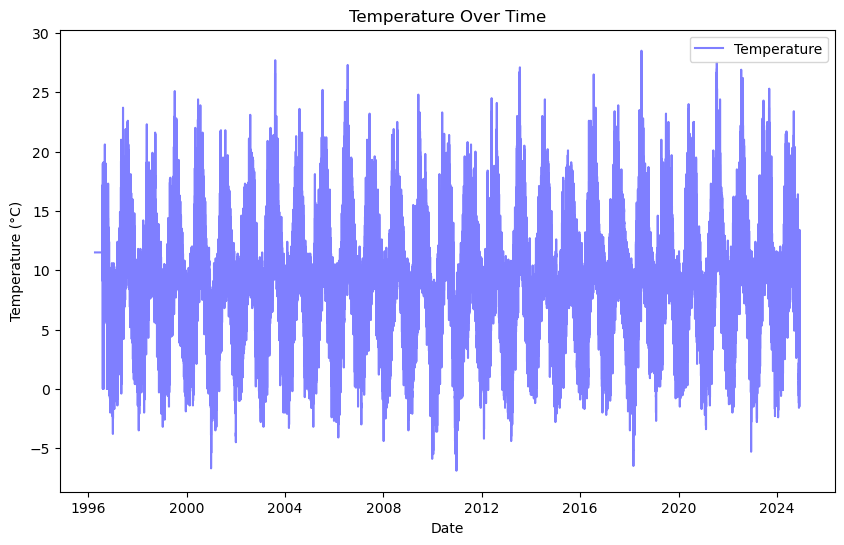

In [21]:
# Plotting the temperature timeline

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp'], color='blue', alpha=0.5, label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

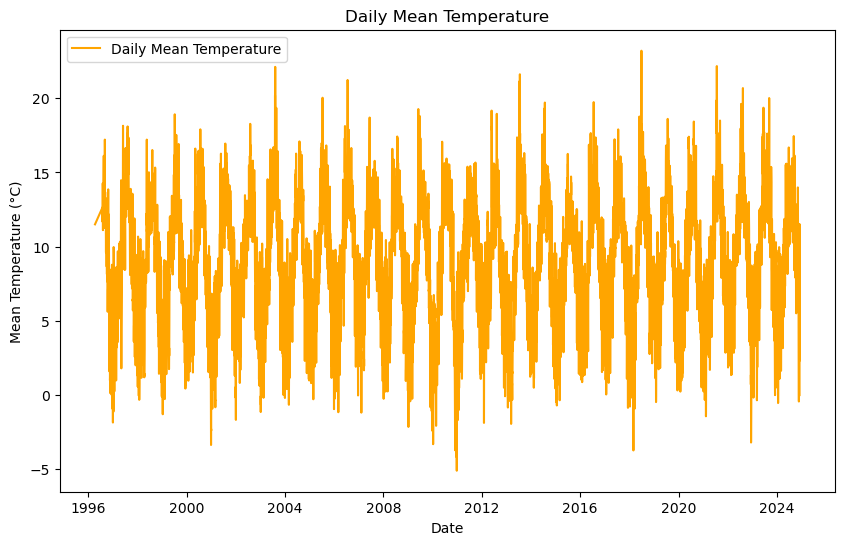

In [10]:
# Calculate the mean temperature each day

daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean()

# Plot the mean temperature each day
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, color='orange', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

In [22]:
# Calculate the mean temperature each month

monthly_mean_temp = df.groupby('month_year')['temp'].mean()

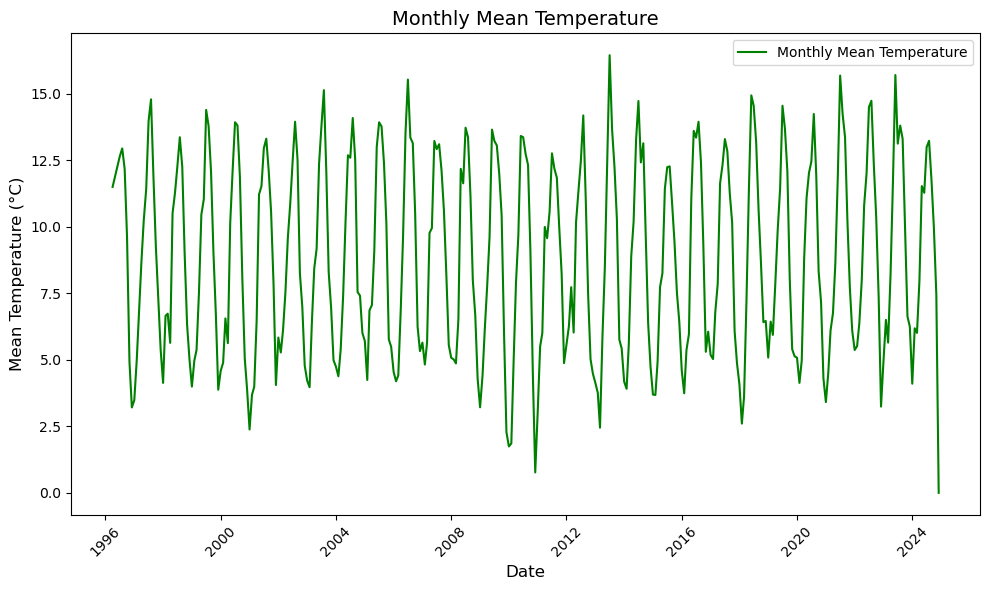

In [27]:
# Ensure 'month_year' is a datetime type
monthly_mean_temp.index = pd.to_datetime(monthly_mean_temp.index, format='%b-%Y')

# Sort by date (if not already sorted)
monthly_mean_temp = monthly_mean_temp.sort_index()

# Plot the mean temperature for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp.values, color='green', label='Monthly Mean Temperature')

# Improve x-axis formatting
plt.title('Monthly Mean Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.legend()
plt.tight_layout()  # Ensure everything fits in the plot area
plt.show()